
Processing: evgeny_arbatov.parquet
Found 23 valid routes
Min length: 5.51 km, Max length: 75.51 km
Mean length: 18.75 km, Std Dev: 16.20 km


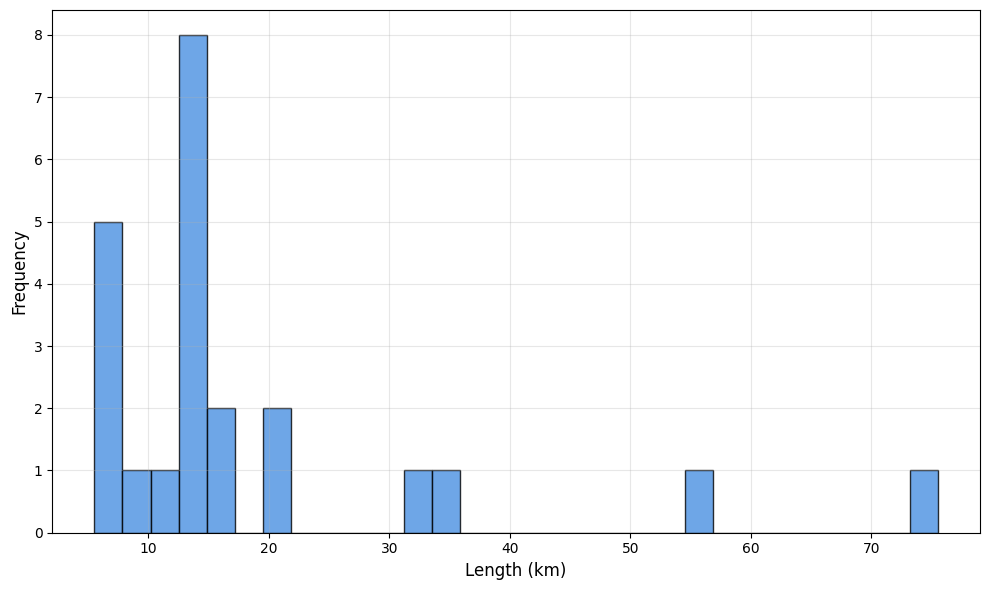

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from geopy.distance import geodesic  # For distance in km

# --- Configuration ---
content_dir = '/content'  # Folder with .parquet files
parquet_files = [f for f in os.listdir(content_dir) if f.endswith('.parquet')]

# Light color for histogram
hist_color = '#4A90E2'

# --- Helper functions ---
def extract_route_coordinates(geometry):
    """Extract coordinates from a geometry as a list of (lat, lon) tuples."""
    if geometry is None or geometry.is_empty:
        return None
    return [(coord[1], coord[0]) for coord in geometry.coords]  # (lat, lon)

def compute_route_length_km(route):
    """Compute total length of a route in kilometers using geodesic distances."""
    if route is None or len(route) < 2:
        return 0
    length = 0
    for i in range(len(route) - 1):
        length += geodesic(route[i], route[i+1]).km
    return length

# --- Process each parquet file ---
for parquet_file in parquet_files:
    print(f"\nProcessing: {parquet_file}")
    file_path = os.path.join(content_dir, parquet_file)

    gdf = gpd.read_parquet(file_path)

    # Extract valid routes and compute lengths
    route_lengths_km = []
    for geom in gdf.geometry:
        coords = extract_route_coordinates(geom)
        if coords is not None and len(coords) > 1:
            length_km = compute_route_length_km(coords)
            route_lengths_km.append(length_km)

    print(f"Found {len(route_lengths_km)} valid routes")

    if len(route_lengths_km) == 0:
        print(f"No valid routes in {parquet_file}")
        continue

    print(f"Min length: {min(route_lengths_km):.2f} km, Max length: {max(route_lengths_km):.2f} km")
    print(f"Mean length: {np.mean(route_lengths_km):.2f} km, Std Dev: {np.std(route_lengths_km):.2f} km")

    # --- Plot route length distribution ---
    plt.figure(figsize=(10, 6), facecolor='white')
    plt.hist(route_lengths_km, bins=30, color=hist_color, alpha=0.8, edgecolor='black')
    plt.xlabel("Length (km)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"/content/route_lengths_km_{parquet_file[:-8]}.png", dpi=150, facecolor='white', bbox_inches='tight')
    plt.show()
    plt.close()
